In [72]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import matplotlib.colors as mcolors
palette = list(mcolors.TABLEAU_COLORS.keys())
%matplotlib inline

In [73]:
#sns.set_theme(style="ticks", palette="pastel")
sns.set_theme(style="ticks", palette="muted")
sns.set_context("talk")

In [74]:
#sns.color_palette(as_cmap=True)

In [75]:
df = pd.read_excel('plotting_data.xlsx')
df['Met-Ade'] = ['{} mM Met - {} uM Ade'.format(m, a) for m, a in zip(df['Met (mM)'], df['Ade (uM)'])]

In [76]:
df.head(3)

,Met (mM),MPA ( uM),Gua (uM),Ade (uM),Count,Size,Met-Ade
0,2,40,100,30,552200,8591,2 mM Met - 30 uM Ade
1,2,40,100,30,554300,8925,2 mM Met - 30 uM Ade
2,2,40,100,125,1270000,5423,2 mM Met - 125 uM Ade


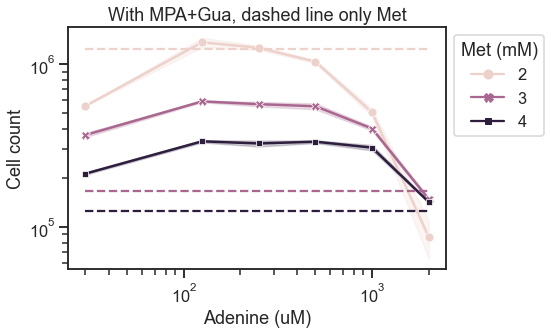

In [77]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

mask = df['Gua (uM)'] == 100

g1 = sns.lineplot(ax=ax1, x="Ade (uM)", y="Count", hue="Met (mM)", style="Met (mM)", data=df[mask], linewidth=2.5, markers=True, dashes=False)

g1.set_title('With MPA+Gua, dashed line only Met')
g1.set_ylabel('Cell count')
g1.set_xlabel('Adenine (uM)')
g1.set_yscale("log")
g1.set_xscale("log")
sns.move_legend(g1, "upper left", bbox_to_anchor=(1, 1))

for mi, mc in enumerate([2, 3, 4]):
    ml = g1.get_lines()[mi]
    mask_m = ~mask & (df['Met (mM)'] == mc)
    bsl = df.loc[mask_m, 'Count'].mean()

    g1.hlines(bsl, 30, 2000, ls='--', color=ml.get_color())

fig.tight_layout()
fig.savefig('Cell_count.pdf', bbox_inches='tight')

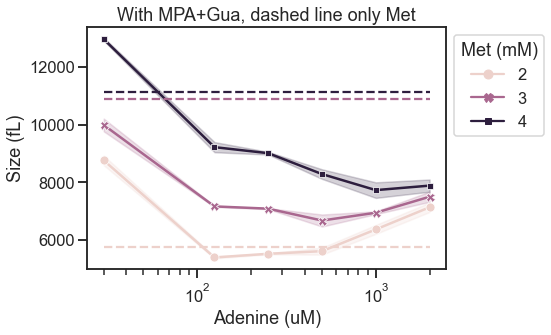

In [78]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
mask = df['Gua (uM)'] == 100

g1 = sns.lineplot(ax=ax1, x="Ade (uM)", y="Size", hue="Met (mM)", style="Met (mM)", data=df[mask], linewidth=2.5, markers=True, dashes=False)

g1.set_title('With MPA+Gua, dashed line only Met')
g1.set_ylabel('Size (fL)')
g1.set_xlabel('Adenine (uM)')
g1.set_xscale("log")
sns.move_legend(g1, "upper left", bbox_to_anchor=(1, 1))

for mi, mc in enumerate([2, 3, 4]):
    ml = g1.get_lines()[mi]
    mask_m = ~mask & (df['Met (mM)'] == mc)
    bsl = df.loc[mask_m, 'Size'].mean()

    g1.hlines(bsl, 30, 2000, ls='--', color=ml.get_color())

fig.tight_layout()
fig.savefig('Cell_size.pdf', bbox_inches='tight')

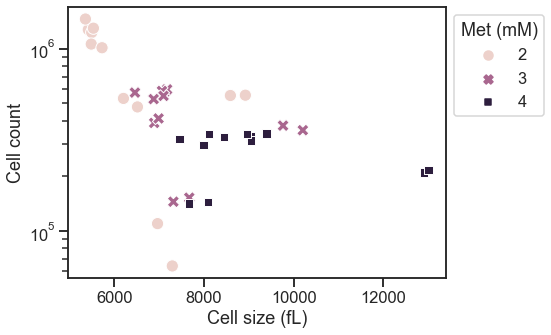

In [96]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

mask = df['Gua (uM)'] == 100

g1 = sns.scatterplot(ax=ax1, x="Size", y="Count", hue="Met (mM)", style="Met (mM)", data=df[mask], s=150)

g1.set_ylabel('Cell count')
g1.set_xlabel('Cell size (fL)')
g1.set_yscale("log")
#g1.set_xscale("log")
sns.move_legend(g1, "upper left", bbox_to_anchor=(1, 1))


fig.tight_layout()
fig.savefig('Cell_count-size.pdf', bbox_inches='tight')